In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("/home/fakhredine/Documents/microsoft/DB/CSV/titatic/train.csv")
test = pd.read_csv("/home/fakhredine/Documents/microsoft/DB/CSV/titatic/test.csv")
gender = pd.read_csv("/home/fakhredine/Documents/microsoft/DB/CSV/titatic/gender_submission.csv")

In [3]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Text(0.5, 1.05, 'Correlation Matrix')

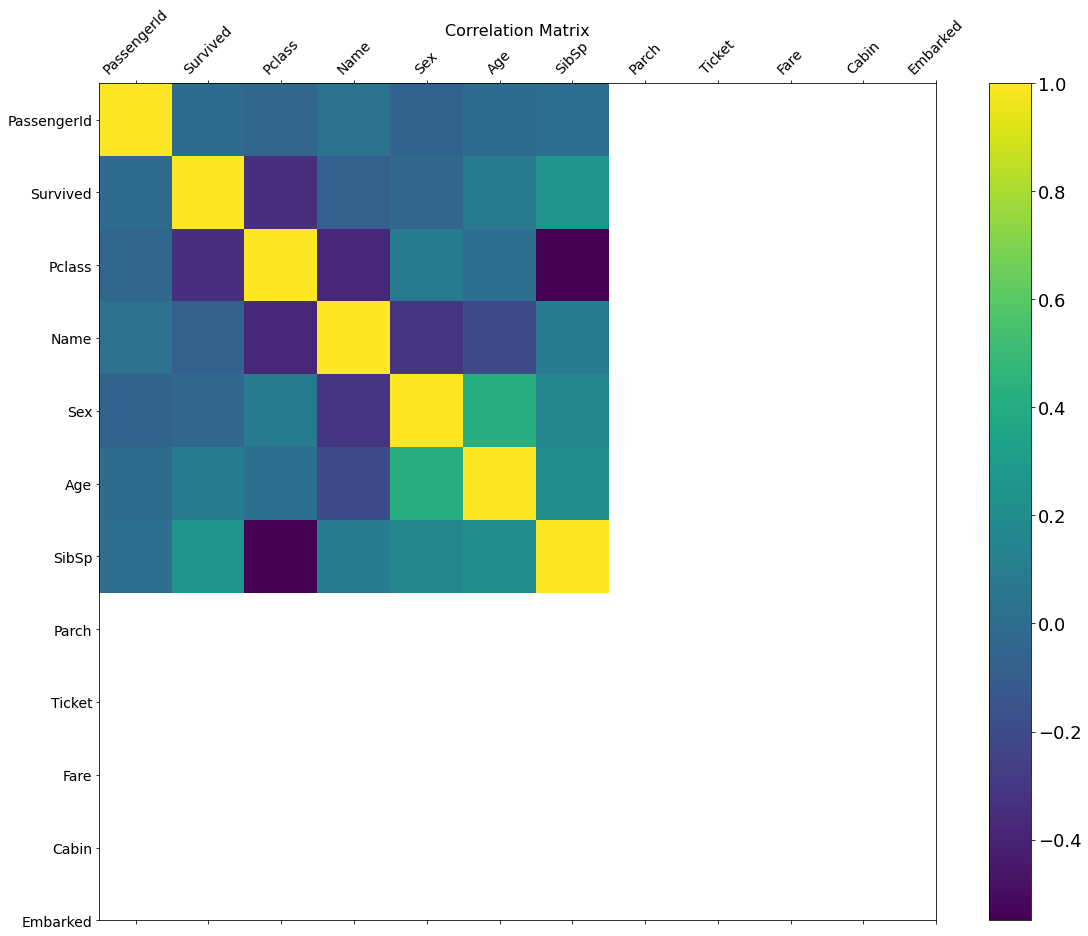

In [6]:
f = plt.figure(figsize=(19, 15))
plt.matshow(train.corr(), fignum=f.number)
plt.xticks(range(train.shape[1]), train.columns, fontsize=14, rotation=45)
plt.yticks(range(train.shape[1]), train.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
plt.title('Correlation Matrix', fontsize=16)

In [7]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1,-0.005,-0.035,0.037,-0.058,-0.0017,0.013
Survived,-0.005,1,-0.34,-0.077,-0.035,0.082,0.26
Pclass,-0.035,-0.34,1,-0.37,0.083,0.018,-0.55
Age,0.037,-0.077,-0.37,1,-0.31,-0.19,0.096
SibSp,-0.058,-0.035,0.083,-0.31,1,0.41,0.16
Parch,-0.0017,0.082,0.018,-0.19,0.41,1,0.22
Fare,0.013,0.26,-0.55,0.096,0.16,0.22,1


In [8]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [10]:
NaNColumns = train.columns[train.isna().any()].tolist()
NaNColumns

['Age', 'Cabin', 'Embarked']

In [11]:
NaNColumns = test.columns[test.isna().any()].tolist()
NaNColumns

['Age', 'Fare', 'Cabin']

In [12]:
train = train.drop(["Cabin", "Ticket", "Name"], axis=1)

In [13]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [14]:
train = train.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [15]:
print(len(train[train['Survived'] == 1]))
print(len(train[train['Survived'] == 0]))

288
424


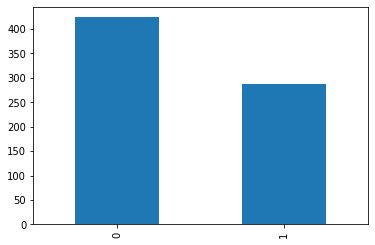

In [16]:
train['Survived'].value_counts().plot.bar()

In [17]:
train["Embarked"] = train["Embarked"].astype('category').cat.codes
train["Sex"] = train["Sex"].astype('category').cat.codes

train

/home/fakhredine/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/fakhredine/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
885,886,0,3,0,39.0,0,5,29.1250,1
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [18]:
X = train.drop('Survived',axis=1)
y = train['Survived']
train.shape

(712, 9)

In [19]:
from sklearn.model_selection import train_test_split
np.random.seed(3456)
# data_split = train_test_split(np.asmatrix(data), test_size = 0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)



# X_train = data_split[0]
# y_train = np.ravel(data_split[0][:, 0])
# X_test = data_split[1]
# y_test = np.ravel(data_split[1][:, 0])

print(X_train.shape)
print(X_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(569, 8)
(143, 8)

(569,)
(143,)


In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/home/fakhredine/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
valid_test = pd.DataFrame(X_test, columns = train.columns)
valid_test['predicted'] = model.predict(X_test)
valid_test['correct'] = [1 if x == z else 0 for x, z in zip(valid_test['predicted'], y_test)]

score = model.score(X_test, y_test)
accuracy = float(sum(valid_test['correct'])) / float(valid_test.shape[0])

print(score)
print(accuracy)

0.8181818181818182
0.8181818181818182


In [57]:
def rmse(X_test, y_test):
    return np.sqrt( ((y_test - model.predict(X_test))**2).mean() / len(y_test) )
    
print("RMSE :", rmse(X_test, y_test))

RMSE : 0.03565747911603346


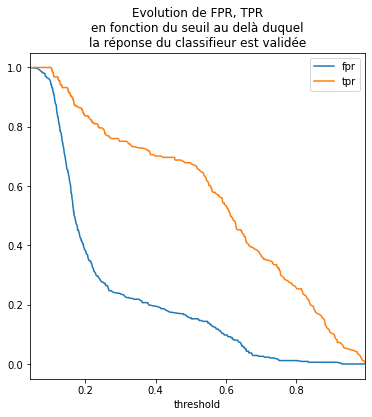

In [58]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
proba = model.predict_proba(X_train)
fpr1, tpr1, thresholds1 = roc_curve(y_train, proba[:, 1], pos_label=model.classes_[1], drop_intermediate=False)

tp = pd.DataFrame(dict(fpr=fpr1, tpr=tpr1, threshold=thresholds1))
tp.drop(0, axis=0, inplace=True) #suppression du 1er seuil fixé arbitrairement à 2

ax = tp.plot(x="threshold", y=['fpr', 'tpr'], figsize=(6,6))
ax.set_title("Evolution de FPR, TPR\nen fonction du seuil au delà duquel\n" + 
             "la réponse du classifieur est validée");

In [59]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
proba = model.predict_proba(X_train)
fpr0, tpr0, thresholds0 = roc_curve(y_train, proba[:, 0], pos_label=model.classes_[0], drop_intermediate=False)
thresholds0.shape

(570,)

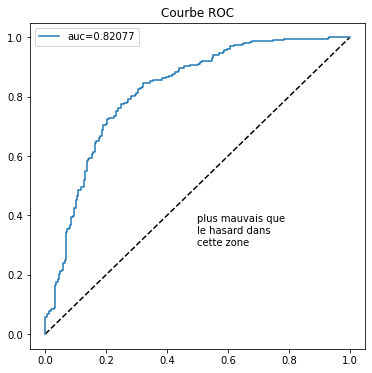

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr0, tpr0)
ax.plot(fpr0, tpr0, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC')
ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
ax.legend()

In [39]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_train, model.predict(X_train)), columns=['prédit ' + str(i) for i in model.classes_])
cm.index = ['vrai ' + str(i) for i in model.classes_]
cm

,prédit 0,prédit 1
vrai 0,294,54
vrai 1,72,149


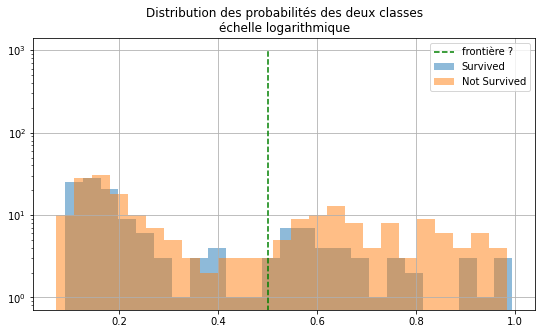

In [63]:
proba_1 = model.predict_proba(X_train)[:, 1]
pr = pd.DataFrame(proba_1, columns=['proba'])
pr['Action'] = y_train

fig, ax = plt.subplots(1,1,figsize=(9,5))

pr[pr.Action == 1]['proba'].hist(bins=25, label='Survived', alpha=0.5, ax=ax)
pr[pr.Action == 0]['proba'].hist(bins=25, label='Not Survived', alpha=0.5, ax=ax)
ax.plot([0.5, 0.5], [0, 1000], 'g--', label="frontière ?")
ax.set_yscale('log') #l'échelle logarithmique permet de mieux voir les probabilités qui sont faibles
ax.set_title('Distribution des probabilités des deux classes\néchelle logarithmique')
ax.legend()

In [64]:
# csvOutPut = valid_test['resilies'] + valid_test['predicted'] + valid_test['correct']
csvOutPut = train
csvOutPut['correct'] = valid_test['correct']
csvOutPut['prediction'] = valid_test['predicted']

csvOutPut[csvOutPut['prediction'] == 1]
csvOutPut[csvOutPut['Survived'] == 1]

csvOutPut
csvOutPut.to_csv("/home/fakhredine/Desktop/prediction.csv", index=False)

/home/fakhredine/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/fakhredine/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
valid_test = pd.DataFrame(X_test, columns = train.columns)
valid_test['predicted'] = model.predict(X_test)
valid_test['correct'] = [1 if x == z else 0 for x, z in zip(valid_test['predicted'], y_test)]

score = model.score(X_test, y_test)
accuracy = float(sum(valid_test['correct'])) / float(valid_test.shape[0])

print(score)
print(accuracy)

0.506058761269884
0.0
